In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import kagglehub
import shutil
import os
import joblib


In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("rassiem/credit-data")

# print("Path to dataset files:", path)

# Dataset link: https://www.kaggle.com/datasets/rassiem/credit-data

100%|██████████| 7.28k/7.28k [00:00<00:00, 9.55MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rassiem/credit-data/versions/1


In [5]:

# Download dataset to default kagglehub cache
downloaded_path = kagglehub.dataset_download("rassiem/credit-data")

# Set your custom destination
destination_path = r"/content/"

# Copy the downloaded files to your desired directory
shutil.copytree(downloaded_path, destination_path, dirs_exist_ok=True)

print("Dataset copied to:", destination_path)


Dataset copied to: /content/


Descriptive Statistics for Numerical Features:
           Income         Limit      Rating       Cards         Age   Education      Balance
count  400.000000    400.000000  400.000000  400.000000  400.000000  400.000000   400.000000
mean    45.218885   4735.600000  354.940000    2.957500   55.667500   13.450000   520.015000
std     35.244273   2308.198848  154.724143    1.371275   17.249807    3.125207   459.758877
min     10.354000    855.000000   93.000000    1.000000   23.000000    5.000000     0.000000
25%     21.007250   3088.000000  247.250000    2.000000   41.750000   11.000000    68.750000
50%     33.115500   4622.500000  344.000000    3.000000   56.000000   14.000000   459.500000
75%     57.470750   5872.750000  437.250000    4.000000   70.000000   16.000000   863.000000
max    186.634000  13913.000000  982.000000    9.000000   98.000000   20.000000  1999.000000

Missing Values Check:
ID           0
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Edu

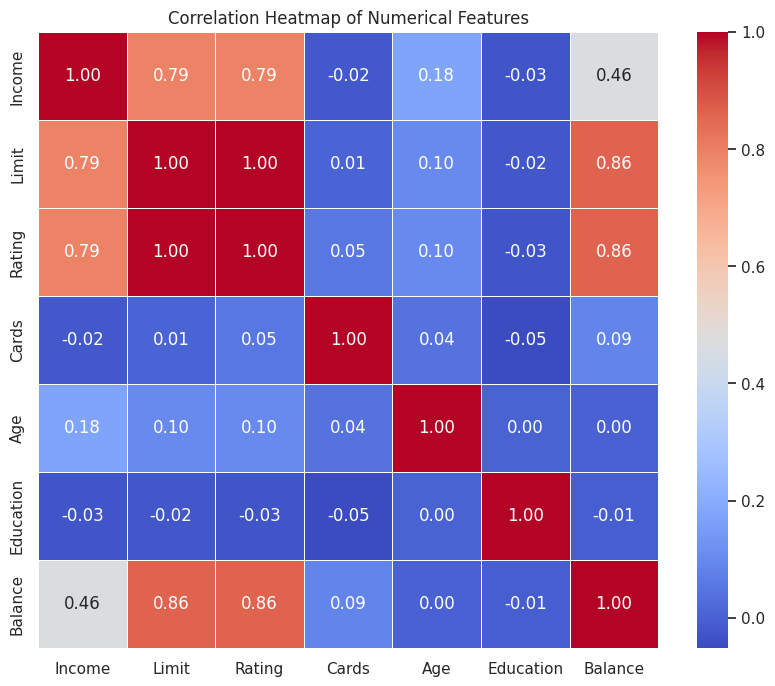

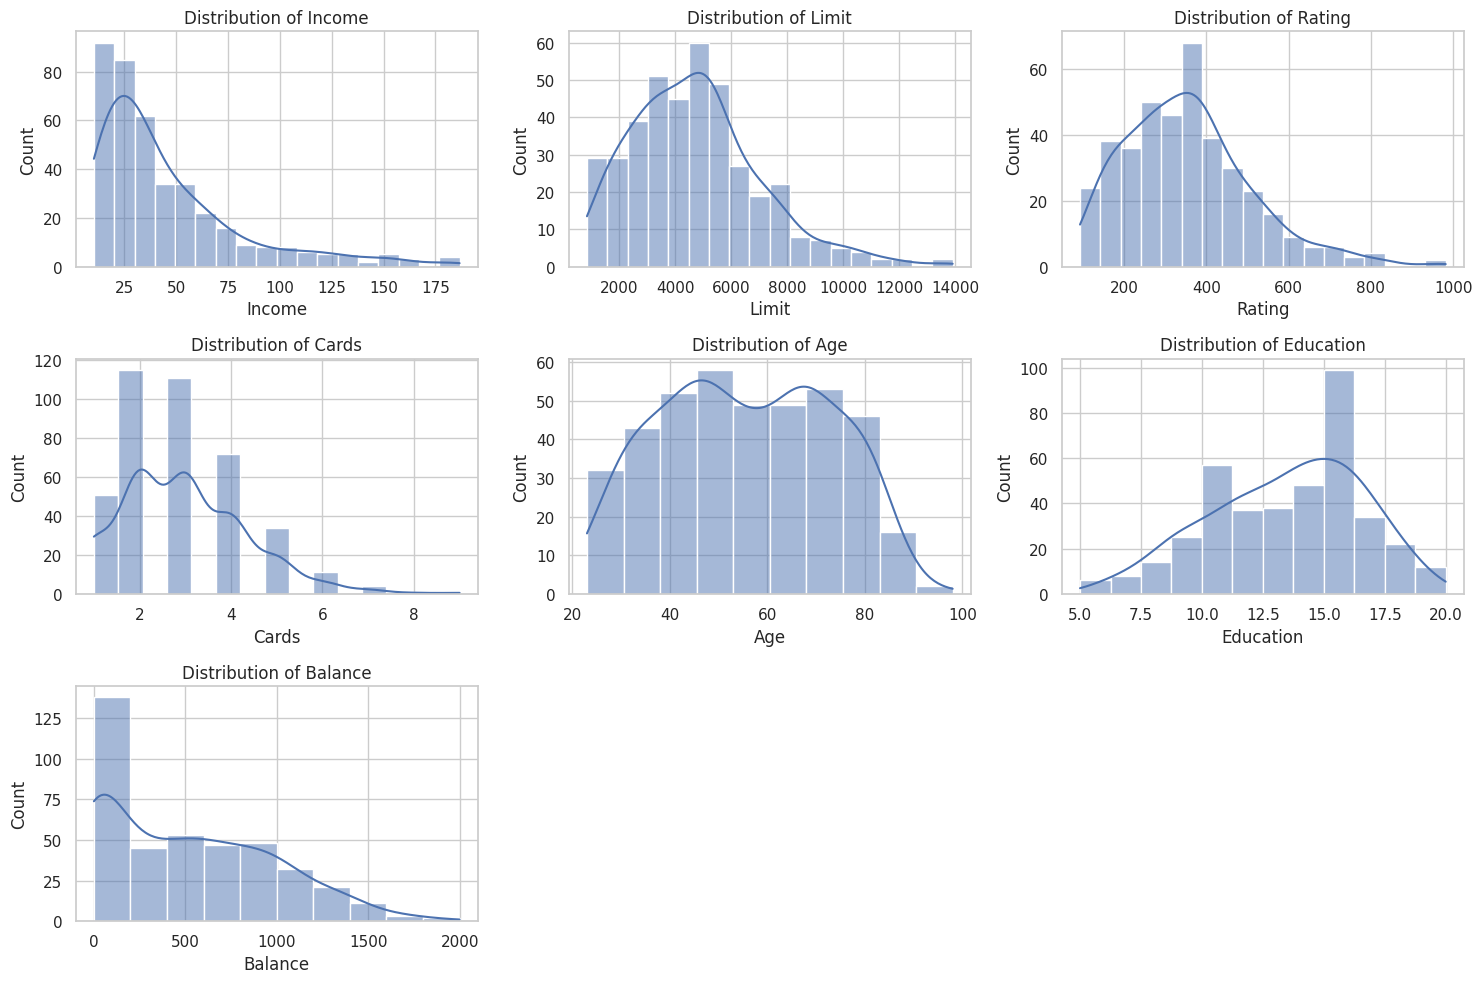


Distribution of Gender:
Gender
Female    207
Male      193



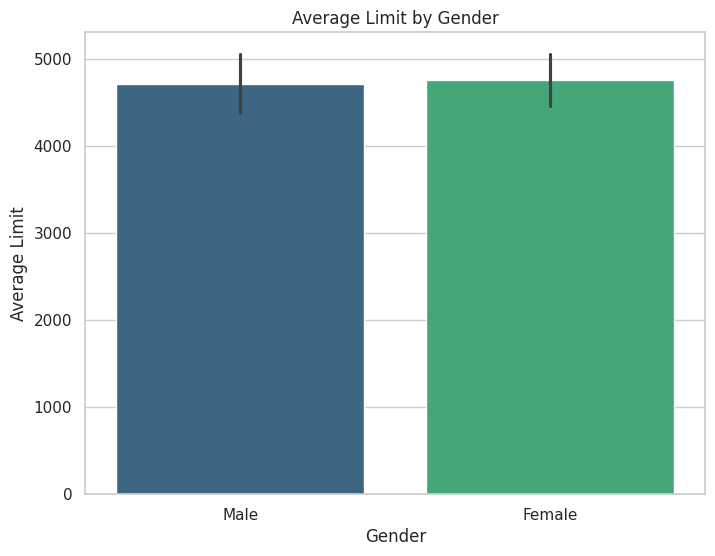


Distribution of Student:
Student
No     360
Yes     40



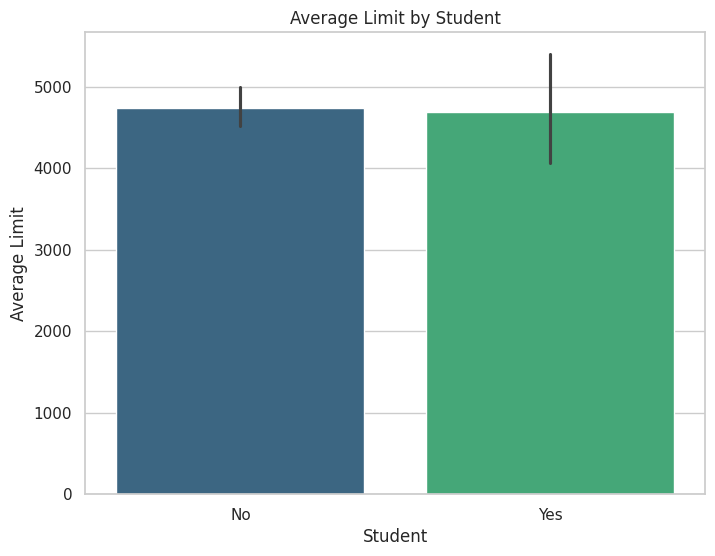


Distribution of Married:
Married
Yes    245
No     155



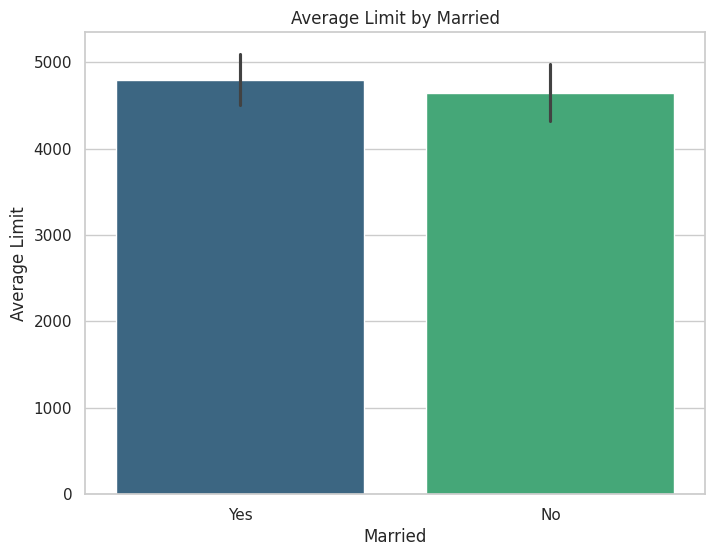


Distribution of Ethnicity:
Ethnicity
Caucasian           199
Asian               102
African American     99



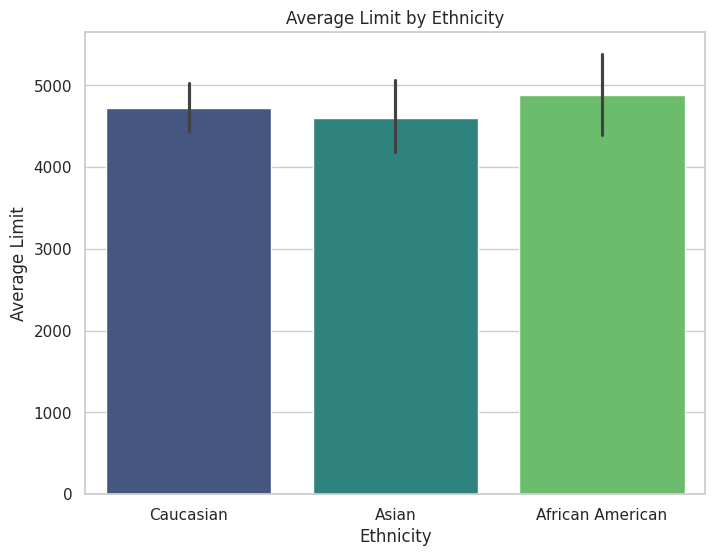

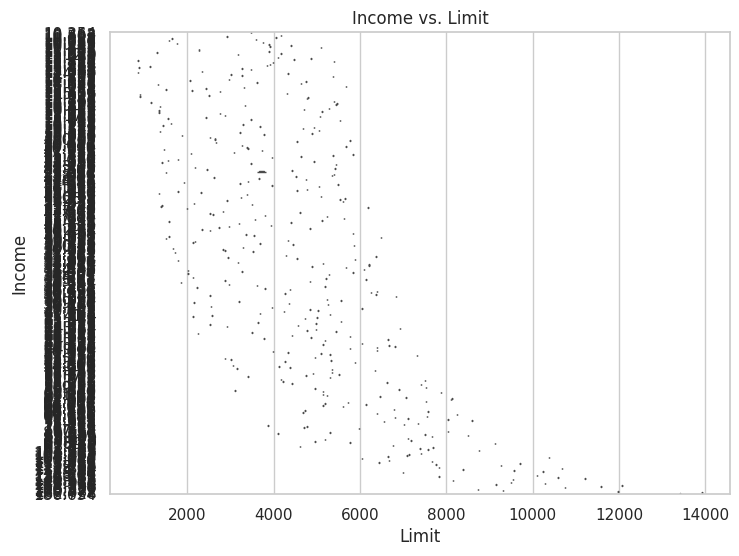

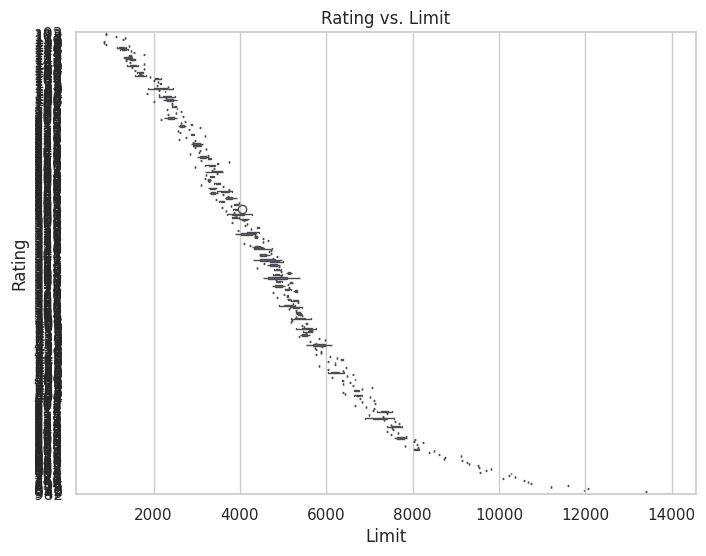

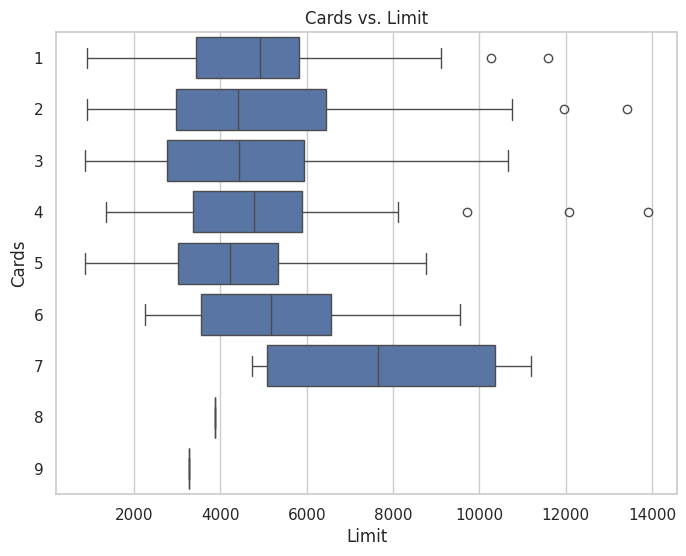

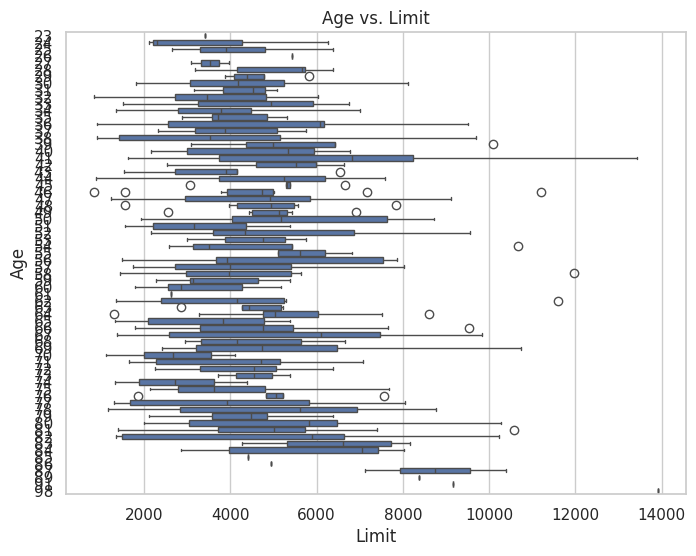

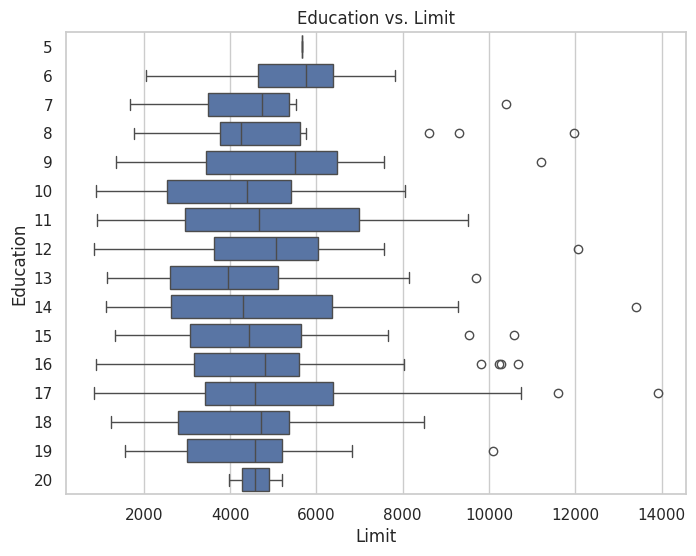

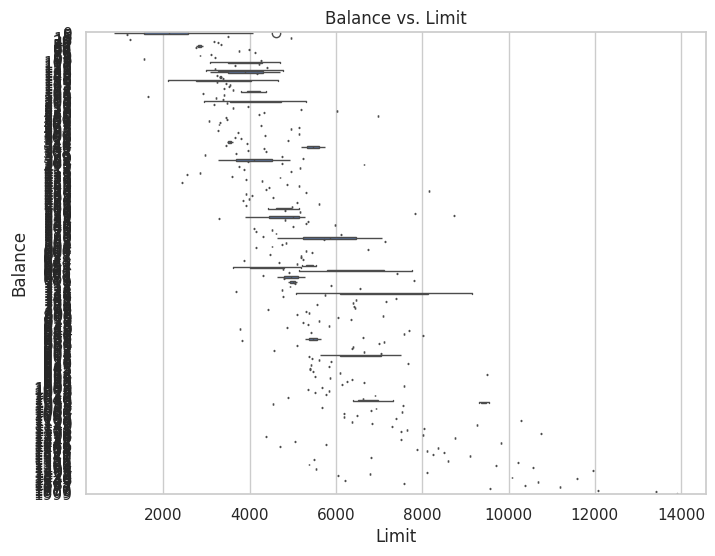

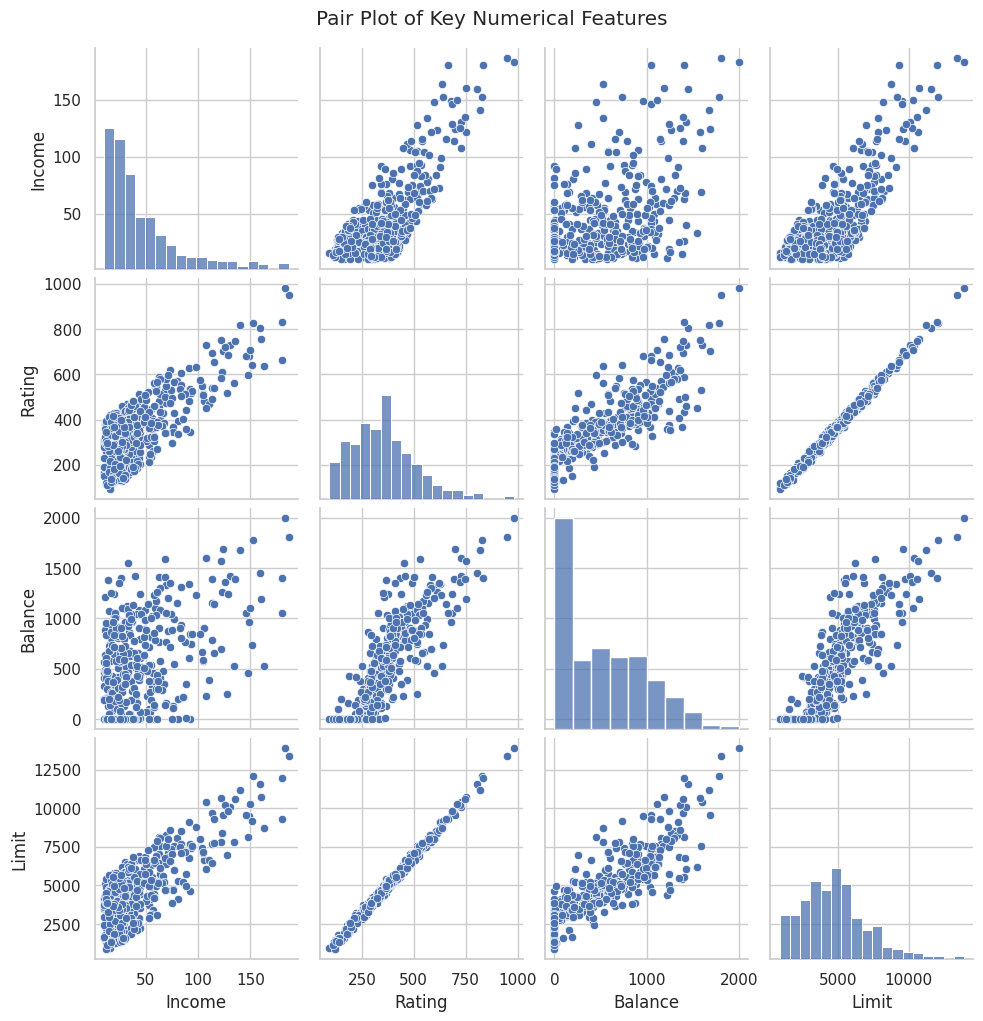

Data analysis completed. Visualizations saved as PNG files:
- correlation_heatmap.png
- numerical_distributions.png
- limit_by_gender.png
- limit_by_student.png
- limit_by_married.png
- limit_by_ethnicity.png
- boxplot_income_vs_limit.png
- boxplot_rating_vs_limit.png
- boxplot_cards_vs_limit.png
- boxplot_age_vs_limit.png
- boxplot_education_vs_limit.png
- boxplot_balance_vs_limit.png
- pairplot_key_features.png


In [14]:
# Set seaborn style for better visualizations
sns.set(style="whitegrid")

# Data from the user
data = pd.read_csv('Credit_Data.csv')

# Create DataFrame
df = pd.DataFrame(data)

# Define numerical and categorical features
numerical_features = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']
categorical_features = ['Gender', 'Student', 'Married', 'Ethnicity']

# 1. Descriptive Statistics
print("Descriptive Statistics for Numerical Features:")
print(df[numerical_features].describe().to_string())
print()

# 2. Missing Values Check
print("Missing Values Check:")
print(df.isnull().sum().to_string())
print()

# 3. Correlation Analysis
print("Correlation Matrix for Numerical Features:")
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix.to_string())
print()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()
plt.close()

# 4. Distribution of Numerical Features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()
plt.close()

# 5. Categorical Feature Analysis
for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    print(df[feature].value_counts().to_string())
    print()

    # Plot bar plot of categorical feature vs. Limit
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y='Limit', data=df, hue=feature, legend=False, palette='viridis')
    plt.title(f'Average Limit by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Limit')
    plt.savefig(f'limit_by_{feature.lower()}.png')
    plt.show()
    plt.close()

# 6. Box Plots for Numerical Features vs. Limit
for feature in numerical_features:
    if feature != 'Limit':  # Exclude Limit itself
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Limit', y=feature, data=df, orient='h')
        plt.title(f'{feature} vs. Limit')
        plt.xlabel('Limit')
        plt.ylabel(feature)
        plt.savefig(f'boxplot_{feature.lower()}_vs_limit.png')
        plt.show()
        plt.close()

# 7. Pair Plot for Key Numerical Features
key_features = ['Income', 'Rating', 'Balance', 'Limit']
sns.pairplot(df[key_features])
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.savefig('pairplot_key_features.png')
plt.show()
plt.close()

print("Data analysis completed. Visualizations saved as PNG files:")
print("- correlation_heatmap.png")
print("- numerical_distributions.png")
for feature in categorical_features:
    print(f"- limit_by_{feature.lower()}.png")
for feature in numerical_features:
    if feature != 'Limit':
        print(f"- boxplot_{feature.lower()}_vs_limit.png")
print("- pairplot_key_features.png")

In [8]:
# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Data from the user
data = pd.read_csv('Credit_Data.csv')

# Create DataFrame
df = pd.DataFrame(data)

# Define features and target
features = ['Income', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance']
target = 'Limit'

# Split features into numerical and categorical
numerical_features = ['Income', 'Rating', 'Cards', 'Age', 'Education', 'Balance']
categorical_features = ['Gender', 'Student', 'Married', 'Ethnicity']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get IDs for test data
test_ids = df.loc[X_test.index, 'ID']

# Dictionary to store model performance and pipelines
model_performance = {}
model_pipelines = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate metrics for training data
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

    # Calculate metrics for test data
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    # Store performance and pipeline
    model_performance[model_name] = {
        'Train RMSE': train_rmse,
        'Train R²': train_r2,
        'Train MAPE': train_mape,
        'Test RMSE': test_rmse,
        'Test R²': test_r2,
        'Test MAPE': test_mape,
        'Test Predictions': pd.DataFrame({
            'ID': test_ids,
            'Actual Limit': y_test,
            'Predicted Limit': y_test_pred
        })
    }
    model_pipelines[model_name] = pipeline

# Function to predict limit for a given ID
def predict_limit_by_id(input_id, model_name='Random Forest'):
    """
    Predict credit limit for a given ID using the specified model.

    Parameters:
    input_id (int): ID of the record
    model_name (str): Name of the model to use for prediction

    Returns:
    float: Predicted credit limit
    """
    if input_id not in df['ID'].values:
        return f"ID {input_id} not found in the dataset."

    # Get data for the given ID
    input_data = df[df['ID'] == input_id][features]

    # Check if model exists
    if model_name not in model_pipelines:
        return f"Model {model_name} not found."

    # Predict using the specified model
    predicted_limit = model_pipelines[model_name].predict(input_data)[0]

    return predicted_limit

# Print model performance
print("Model Performance:")
for model_name, metrics in model_performance.items():
    print(f"\n{model_name}:")
    print("Training Metrics:")
    print(f"  RMSE: {metrics['Train RMSE']:.2f}")
    print(f"  R²: {metrics['Train R²']:.2f}")
    print(f"  MAPE: {metrics['Train MAPE']:.2f}%")
    print("Test Metrics:")
    print(f"  RMSE: {metrics['Test RMSE']:.2f}")
    print(f"  R²: {metrics['Test R²']:.2f}")
    print(f"  MAPE: {metrics['Test MAPE']:.2f}%")
    print("\nTest Data - Actual vs Predicted Limits:")
    print(metrics['Test Predictions'][['ID', 'Actual Limit', 'Predicted Limit']].to_string(index=False))
    print()

# Example usage of predict_limit_by_id
print("Example Predictions:")
for id in [1, 3, 5]:
    prediction = predict_limit_by_id(id, 'Random Forest')
    print(f"Predicted Limit for ID {id} (Random Forest): {prediction:.2f}")

Model Performance:

Linear Regression:
Training Metrics:
  RMSE: 145.75
  R²: 1.00
  MAPE: 3.68%
Test Metrics:
  RMSE: 142.79
  R²: 0.99
  MAPE: 2.85%

Test Data - Actual vs Predicted Limits:
 ID  Actual Limit  Predicted Limit
210          9156      9038.893559
281          5319      5066.028422
 34          1829      1806.618335
211          3206      3077.547917
 94          5435      5351.038149
 85          2906      2815.659621
330          7576      7392.805895
 95          3075      3051.014718
267          4952      4665.921888
127          5533      5751.810621
 10          6819      6777.295653
362          4943      4897.476243
 57          4742      4673.521934
 73          4923      4914.688122
133          5443      5430.475947
 43          4763      4719.577698
279          6982      7117.980764
377          7167      7173.765002
232          4776      4941.097866
386          5640      5461.640157
 78          3254      3342.483516
 16          2525      2376.698108
392

Linear Regression performed best with the metrics of

Linear Regression:
Training Metrics:
  RMSE: 145.75
  R²: 1.00
  MAPE: 3.68%
Test Metrics:
  RMSE: 142.79
  R²: 0.99
  MAPE: 2.85%

In [11]:

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Create DataFrame
df = pd.DataFrame(data)

# Define features and target
features = ['Income', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance']
target = 'Limit'

# Split features into numerical and categorical
numerical_features = ['Income', 'Rating', 'Cards', 'Age', 'Education', 'Balance']
categorical_features = ['Gender', 'Student', 'Married', 'Ethnicity']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create pipeline with Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get IDs for test data
test_ids = df.loc[X_test.index, 'ID']

# Train model
pipeline.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate metrics for training data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Calculate metrics for test data
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Save the model
joblib.dump(pipeline, 'linear_regression_model.pkl')

# Save test data to CSV
test_data = pd.DataFrame(X_test, columns=features)
test_data['ID'] = test_ids.values
#test_data['Actual Limit'] = y_test.values
#test_data['Predicted Limit'] = y_test_pred
test_data.to_csv('test_data2.csv', index=False)

# Print model performance
print("Linear Regression Model Performance:")
print("Training Metrics:")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  R²: {train_r2:.2f}")
print(f"  MAPE: {train_mape:.2f}%")
print("Test Metrics:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  R²: {test_r2:.2f}")
print(f"  MAPE: {test_mape:.2f}%")
print("\nTest Data - Actual vs Predicted Limits:")
test_data['Actual Limit'] = y_test.values
test_data['Predicted Limit'] = y_test_pred
print(test_data[['ID', 'Actual Limit', 'Predicted Limit']].to_string(index=False))

Linear Regression Model Performance:
Training Metrics:
  RMSE: 145.75
  R²: 1.00
  MAPE: 3.68%
Test Metrics:
  RMSE: 142.79
  R²: 0.99
  MAPE: 2.85%

Test Data - Actual vs Predicted Limits:
 ID  Actual Limit  Predicted Limit
210          9156      9038.893559
281          5319      5066.028422
 34          1829      1806.618335
211          3206      3077.547917
 94          5435      5351.038149
 85          2906      2815.659621
330          7576      7392.805895
 95          3075      3051.014718
267          4952      4665.921888
127          5533      5751.810621
 10          6819      6777.295653
362          4943      4897.476243
 57          4742      4673.521934
 73          4923      4914.688122
133          5443      5430.475947
 43          4763      4719.577698
279          6982      7117.980764
377          7167      7173.765002
232          4776      4941.097866
386          5640      5461.640157
 78          3254      3342.483516
 16          2525      2376.698108
392  

In [12]:
# Load the saved model
model = joblib.load('linear_regression_model.pkl')

# Load the test data
test_data = pd.read_csv('test_data2.csv')

# Define features
features = ['Income', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance']

# Function to predict limit for a given ID
def predict_limit_by_id(input_id):
    """
    Predict credit limit for a given ID using the saved model and test data.

    Parameters:
    input_id (int): ID of the record

    Returns:
    float: Predicted credit limit
    """
    if input_id not in test_data['ID'].values:
        return f"ID {input_id} not found in the test dataset."

    # Get data for the given ID
    input_data = test_data[test_data['ID'] == input_id][features]

    # Predict using the loaded model
    predicted_limit = model.predict(input_data)[0]

    return predicted_limit

# Example predictions
print("Example Predictions using Saved Model:")
for id in [11111, 210, 281]:
    if id in test_data['ID'].values:
        prediction = predict_limit_by_id(id)
        print(f"Predicted Limit for ID {id}: {prediction:.2f}")
    else:
      print("ID", id ,"is not found")

Example Predictions using Saved Model:
ID 11111 is not found
Predicted Limit for ID 210: 9038.89
Predicted Limit for ID 281: 5066.03
